In [1]:
# Generelle moduler og funksjonsbeskrivelser brukt i forelesningen
from numpy import sin, cos, pi, exp, e
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [8.00, 4.5]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.xmargin"] = 0.0

%matplotlib ipympl

<img src="Figurer/NTNU_Logo.png" align="left" style="width: 30%">
<br clear="all" />
<br></br>

# Z-transformasjon del 1

* **Emne AIS2102 - Dynamiske System**
* **Uke 7, 2025**
* **Underviser: Kai Erik Hoff**

## Tema:
* Repetisjon Tidsdiskrete LTI-system
* Kontinuerlige LTI-system, laplacetransformasjon og transferfunksjonen $H(s)$
* Diskrete LTI-system, Z-transformasjon og transferfunksjonen $H(z)$
* Analyse av Transferfunksjon $H(z)$ 
* Transferfunksjon og frekvensrespons

## Repetisjon Tidsdiskrete System

* **Digitale LTI-system:**
    * Fellesbetegnelse for system som kalkulerer utgangsveriden $y[k]$ basert på en lineær kombinasjon av verdiene til inngangssignalet ved foregående sampletidspunkt $u[k-i], \ \ i\in \{0, 1, 2, \ldots\}$ ***og*** tidligere kalkulerte verdier til utgangssignalet $y[k-i], \ \ i \in \{1, 2, \ldots\}$.

* **Generell Differanseligning:**
$$\sum_{i=0}^{N} a_i \cdot y[k-i] = \sum_{i=0}^{M} b_i \cdot u[k-i]$$
* **Systemalgoritme:**
$$y[k] = \frac{1}{a_0}\cdot \left(\sum_{i=0}^{M} b_i \cdot u[k-i] - \sum_{i=1}^{N}a_i\cdot  y[k-i] \right)$$

# Førsteordens Digitale LTI-system

* Impulsresponsen $h[k]$ vil som regel være en geometrisk rekke
    * Eksempel for $y[k] = 0.2\cdot u[k] + 0.8\cdot y[k-1]$:
    $$h[k] = \begin{cases}0.2\cdot 0.8^k,& k\geq 0 \\ 0,& k<0\end{cases}$$

* Impulsrespons/stegrespons samme generelle form som tidskontinuerlige førsteordens sysstem
<img src="Figurer/14_Ztransform/Fig1_StepResponses.png" style="width: 80%; margin-left: 10%" />


# Analyse av LTI-system?

<img src="Figurer/12_IIR%20Filtre/Fig4_IIRdesign.png" style="width: 60%; margin-left: 200px" />

# LTI-system og *Egenfunksjoner*

* **Egenfunksjon**:
    * Inngangssignalet $u(t)$ som produserer et utgangssignal $y(t) = \lambda \cdot u(t), \ \ \lambda \in \mathbb{C}$
    * $\lambda$ er systemets *egenverdi*
    * $u(t) = e^{s\cdot t}$ er *egenfunksjonen* til alle LTI-system
        * **Sentral egenskap:** $\frac{d e^{s \cdot t}}{dt} = s \cdot e^{s \cdot t}$
        * $s$ er et komplekst tall: $s = \sigma + j \omega$
        * Egenverdien $\lambda$ vil avhenge av $s$, dvs.: $\lambda = \lambda(s)$

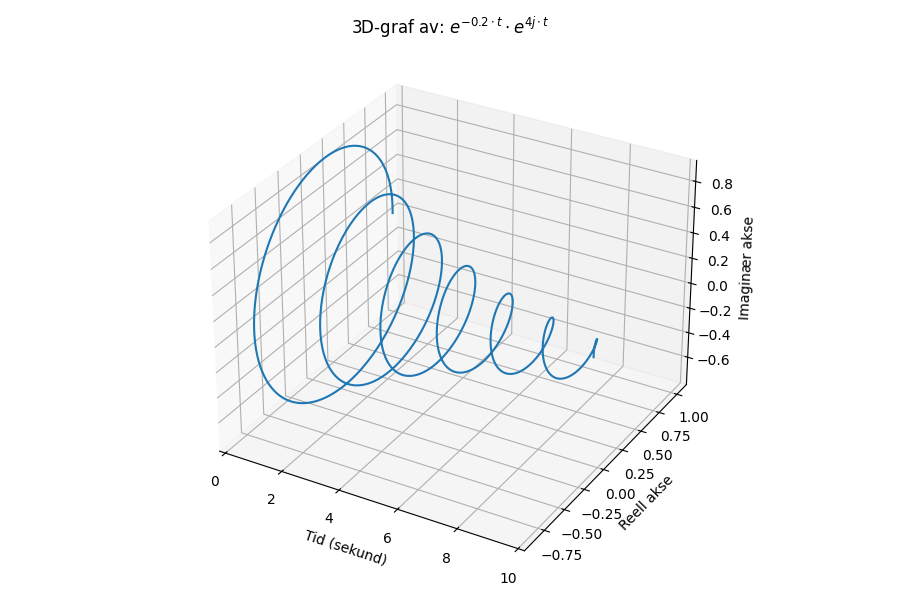

In [2]:
from demos import showOscillation
# Angi punkt på s-planet,
s = -0.2 + 4j
# Visualiser egenfunksjonen e^st
showOscillation(s, T=10)

# *Laplacetransformasjon*

* Formell Definisjon:

$$H(s) = \int_0^{\infty} h(t)\cdot e^{-s\cdot t}dt$$

* Funksjonen $h(t)$ er her *impulsresponsen* til et LTI-system
    - dvs. $h(t)$ er utgangen $y(t)$ som produseres av et system dersom det påtrykkes en funkjson $u(t) = \delta(t)$

* Vi ser på sammenhengen mellom egenfunksjoner, impulsrespons og transferfunksjoner.

# Tidskontinuerlige LTI-system og laplace

* Beskrevet med en *differensialligning*
    * Eksempel:

$$\frac{d^2y(t)}{d t^2} + 2\frac{d y(t)}{d t} + 10\cdot y(t) = \frac{d u(t)}{d t} + u(t) $$

* Laplacetransformasjon gir *transferfunksjonen* $H(s)$
    * Eksempel:
    
$$H(s) = \frac{s + 1}{s^2 + 2s + 10}$$

* Transferfunksjonen $H(s)$ er ekvivalent med LTI-systemets *egenverdi*: 

$$H(s) = \lambda(s)$$


* Transferfunksjon $H(s)$ beskriver hvordan systemet vil respondere på et inngangs-signal $u(t) = e^{s\cdot t}$:
    * $y(t) = u(t)\cdot H(s), \ \ \ u(t)=e^{s\cdot t}$

## Simulert demonstrasjon av egenfunksjoner og egenverdier

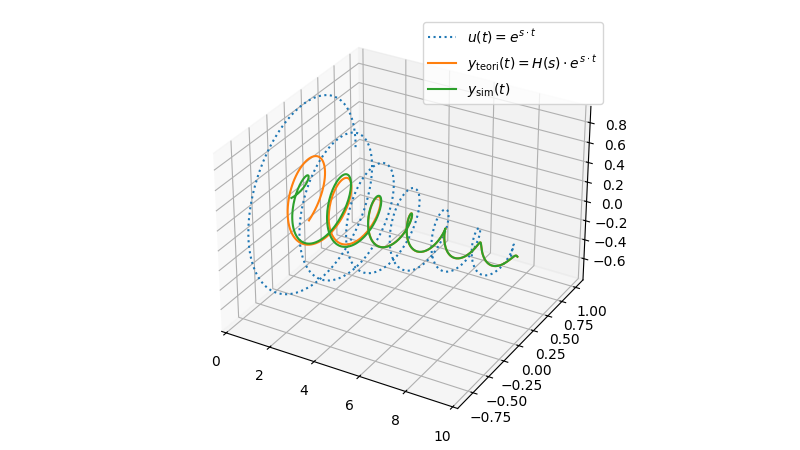

In [3]:
# Angi punkt på s-planet,
s = -0.2 + 4j

# Systemkoeffisienter for H(s)=(s+1)/(s^2 + 2s + 10)
b, a = [1, 1], [1, 2, 10]

# Generer egenfunksjonen u(t) = e^st
t = np.linspace(0, 10, 501)
u = e**(s*t)

# Finn egenverdien til systemet H(s) gitt variabelen 's'
Hs = (b[0]*s+b[1])/(a[0]*s**2+a[1]*s+a[2])

# Kjør en numerisk simulering med u(t) som input
sys = sig.TransferFunction(b, a)
_, y_real, _ = sys.output(np.real(u), t) # Prosesser imaginær og reell del 
_, y_imag, _ = sys.output(np.imag(u), t) # separat (lsim begrensninger).

# Visualiser alle signalene i et 3D plot
plt.close(1); plt.figure(1)
ax = plt.axes(projection='3d')
ax.plot3D(t, np.real(u), np.imag(u), ':', label="$u(t) = e^{s\\cdot t}$")
ax.plot3D(t, np.real(u*Hs), np.imag(u*Hs), label = "$y_{\\text{teori}}(t) = H(s) \\cdot e^{s \\cdot t}$")
ax.plot3D(t, y_real, y_imag, label= "$y_{\\text{sim}}(t)$")
plt.legend()
#print(np.abs(Hs), np.angle(Hs, deg=True))

#### Notater:
Vi ser her i begynnelsen at det simulerte utgangssignalet avviker fra $H(s) \cdot e^{s\cdot t}$, men dette kommer av at vi ikke har inkludert de korrekte initialbetingelsene. Etter hvert som systemet responderer til den brå starten av signalet $u(t) = e^{s\cdot t}$, konvergerer de simulerte og teoretiske utgangsverdiene med hverandre, og vi ser at utgangssignalet følger kurven til egenfunksjonen $e^{s\cdot t}$ multiplisert med egenverdien $\lambda = H(s)$.


Uttrykket for Laplacetransformasjon kan faktisk utledes matematisk. Gitt at vi har et lineært og tids-invariant system med impulsrespons $h(t)$, kan vi utlede hva utgangen blir når vi påtrykker egenfunksjonen $u(t) = e^{s\cdot t}$:

1. Uttrykk systemet slik at utgangen $y(t)$ kan utrrykkes som en funksjon av påtrykket $u(t)$:
$$y(t) = F(u(t)) $$
2. Med litt triksing kan vi omskrive $u(t)$ til et integraluttrykk med [forskyving av deltapulsen $\delta (t)$](https://en.wikipedia.org/wiki/Dirac_delta_function#Translation):
$$
\begin{align}u(t) &= \int_{-\infty}^{\infty} u(\tau) \cdot \delta(t-\tau) d\tau \\
&\Downarrow \\
y(t) &= F\left( \int_{-\infty}^{\infty} u(\tau) \cdot \delta(t-\tau) d\tau \right)
\end{align}
$$
4. Videre er inngår det av [linearitetsegenskapene](https://en.wikipedia.org/wiki/Linearity#Linear_maps) til systemet at vi kan sette integralet utenfor funksjonsuttrykket $F(\cdots)$, ettersom $F(a\cdot u_1(t) + b \cdot u_2(t)) = a \cdot F(u_1(t)) + b \cdot  F( u_2(t))$
$$F\left( \int_{-\infty}^{\infty} u(\tau) \cdot \delta(t-\tau) d\tau \right) = \int_{-\infty}^{\infty} u(\tau) \cdot F\left( \delta(t-\tau) \right) d\tau$$
5. Definisjonen på systemets impulsrespons er $h(t) = F(\delta(t))$, og siden systemet er [*tids-invariant*](https://en.wikipedia.org/wiki/Time-invariant_system), betyr det også at $F(\delta(t-\tau)) = h(t-\tau)$.
$$y(t) = \int_{-\infty}^{\infty} u(\tau) \cdot h(t-\tau) d\tau$$
6. Uttrykket ovenfor er det vi kaller et [*konvolusjonsintegral*](https://en.wikipedia.org/wiki/Convolution#Visual_explanation), og ettersom konvolusjon er en kommutativ operasjon kan vi bytte plass på uttrykkene inne i integralet.
$$y(t) = \int_{-\infty}^{\infty} h(\tau) \cdot u(t-\tau) d\tau$$
7. Nå kan vi gjøre en viss antagelse om at universet systemet eksisterer i er kausalt. Det vil si at dersom systemet påtrykkes en deltapuls, er det på ingen måte mulig at systemet produserer en respons *før* impulsen treffer systemet. Vi kan derfor konkludere at $h(t) = 0$ for alle verdier $t < 0$.
$$
\begin{align}
y(t) &= \int_{-\infty}^{0} h(\tau) \cdot u(t-\tau) d\tau + \int_{0}^{\infty} h(\tau) \cdot u(t-\tau) d\tau\\
&= \int_{0}^{\infty} h(\tau) \cdot u(t-\tau) d\tau
\end{align}
$$
8. Til slutt kan vi utføre substitusjonene $u(t) = e^{s\cdot t}$ og $y(t) = \lambda(s) \cdot e^{s\cdot t}$:
$$
\begin{align}
y(t) &= \int_{0}^{\infty} h(\tau) \cdot u(t-\tau) d\tau \\
\lambda(s) \cdot e^{s\cdot t} &= \int_{0}^{\infty} h(\tau) \cdot e^{s\cdot (t-\tau)} d\tau \\
\lambda(s) \cdot e^{s\cdot t} &= \int_{0}^{\infty} h(\tau) \cdot e^{s\cdot t } \cdot e^{-s \cdot \tau} d\tau \\
\lambda(s) &= \int_{0}^{\infty} h(\tau)\cdot e^{-s \cdot \tau} d\tau
\end{align}
$$

Det vi sitter igjen med er et uttrykk for hva egenverdien $\lambda$ til systemet er gitt en egenfunksjon $e^{s\cdot t} $. Dette uttrykket er uttrykket for laplacetransformasjon.

# Alternativ utledning av transferfunksjon

In [4]:
import numpy as np
np.exp(-0.2/4)

0.951229424500714

1. Når $x(t)$ er antatt å være egenfunksjonen $e^{s\cdot t}$ omformes en *differensialligning* til en *algebraisk ligning*
    * Eksempel:
    
$$
\begin{align}
\frac{d^2 y(t)}{d^2 t} + 2\frac{d y(t)}{d t} + 10\cdot y(t) &=  \frac{d u(t)}{d t} + u(t) \\ \\
&\Downarrow \text{sett } x(t) = e^{s\cdot t} \text{ og } y(t) = H(s) \cdot e^{s \cdot t}\\ \\
\frac{d^2 H(s) \cdot e^{s \cdot t}}{d^2 t} + 2\frac{d H(s) \cdot e^{s \cdot t}}{d t} + 10 H(s) \cdot e^{s \cdot t} &= \frac{d e^{s \cdot t}}{dt} + e^{s \cdot t} \\ \\
s^2 H(s) \cdot e^{s \cdot t} + 2s H(s) \cdot e^{s \cdot t} + 10 H(s) \cdot e^{s \cdot t} &= s\cdot e^{s \cdot t} + e^{s \cdot t} \\ \\
s^2 H(s) + 2s H(s) + 10 H(s) &= s + 1 \\ 
H(s) \cdot \left(s^2 + 2s + 10\right) &= s+1 \\
H(s) &= \frac{s+1}{s^2+2s+10}
\end{align}
$$



# Poler og nullpunkt

* Faktorisering av *transferfunksjonen* $H(s)$ gir *poler* og *nullpunkt*
    * Eksempel:
$$H(s) = \frac{s - (-1)}{\left(s-(-1 + 3j)\right)\left(s-(-1-3j)\right)}$$
        * Nullpunkt: $s=-1$
        * Poler: $s=-1\pm 3j$

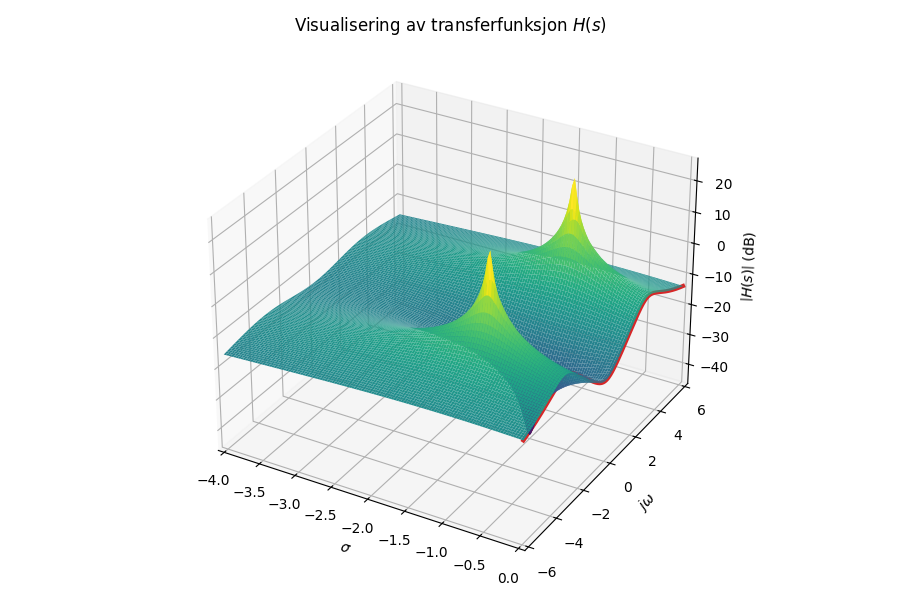

In [5]:
from demos import HsPlot
plt.close(2); plt.figure(2, figsize=(9,6))

HsPlot([1, 1],[1, 2, 10],axes=[-4, 0, -6, 6]) # Ikke en standard funksjon, men skrevet for å kunne lage denne visualiseringen

# Sinusbølger og komplekse eksponentialer

<img src="Figurer/03_Sinussignal/Fig18_rePhasor.gif" align="right" width="20%" />

<br>
<br>

* Cosinus er den relle delen av funksonen $e^{j\omega \cdot t}$
$$\cos(\omega t) = \mathfrak{R}e\left(e^{j\omega t}\right)$$
* Sinus er den imaginære delen av funksonen $e^{j\omega \cdot t}$
$$\sin(\omega t) = \mathfrak{I}m\left(e^{j\omega t}\right)$$

### LTI-system og Sinussignal:

$$
\begin{align}
\mathfrak{R}\left(H(j\omega)\cdot e^{j\omega\cdot t} \right) &= \mathfrak{R}\left(|H(j\omega)|\cdot e^{j\angle H(j\omega)}\cdot e^{j\omega\cdot t}\right) \\
&= \mathfrak{R}\left(|H(j\omega)|\cdot e^{j(\angle H(j\omega)+\omega\cdot t)}\right) \\
&= |H(j\omega)|\cdot \cos\left(\omega \cdot t + \angle H(j\omega)\right)
\end{align}
$$

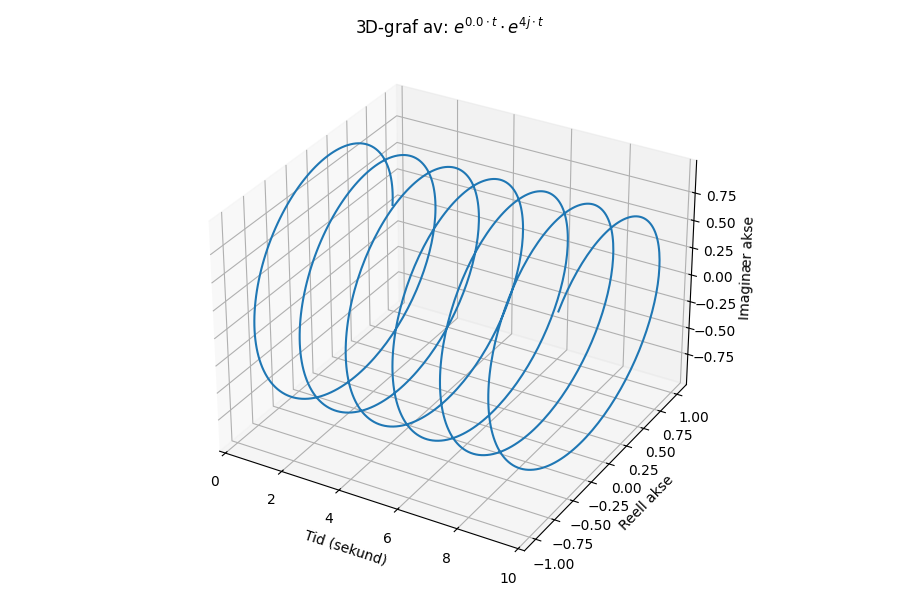

In [6]:
from demos import showOscillation
# Angi punkt på s-planet,
s = 0 + 4j
# Vis kurven e^st
showOscillation(s, T=10)


# Transferfunksjonen $H(s)$ og frekvensresponsen $H(\omega)$





* "Korketrekkerfunksjonen" $e^{j\omega t}$ er et spesialtilfelle av egenfunksjonen $e^{s\cdot t}$ der funksjonen er *periodisk*

$$H(\omega) = H(s)\big|_{s = j\cdot \omega}$$

* Vi kan "lese av" frekvensresponsen $H(\omega)$ til et LTI-system ved å analysere den imaginære aksen i frekvensplanet

Text(0, 0.5, 'Magnitude')

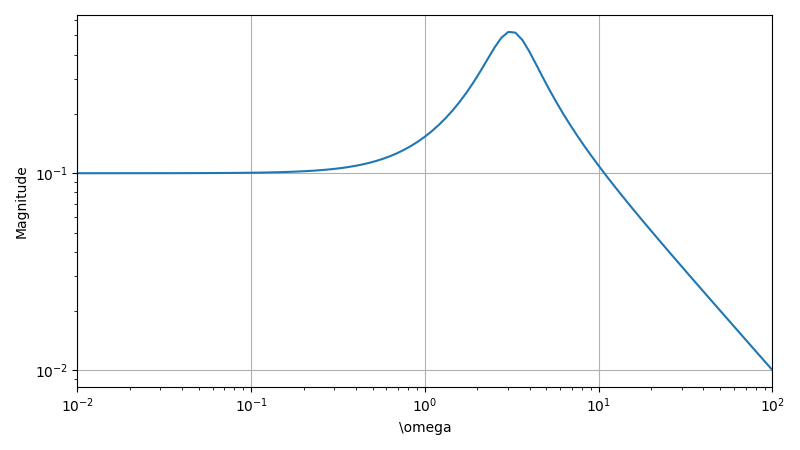

In [7]:
def H(s):
    return (s+1)/(s**2 + 2*s + 10)

omega = np.logspace(-2, 2, 101)
s = 0 + 1j*omega

plt.close(5); plt.figure(5)
plt.loglog(omega, np.abs(H(s)))
plt.xlabel("\\omega"); plt.ylabel("Magnitude")

# Forskjellen mellom tidsdiskréte tidskontinuerlige LTI-system

* Den mest vesentlige forskjellen mellom tidskontinuerlige system og digitale system er at ***derivasjon*** i differensialligningen er erstattet med ***tidsforskyvning*** i differanseligningen.
    * Interessant å begynne med et digitalt system som utfører tidsforskyvning: 
    $$y[k] = u[k+1]$$

* Et diskretisert LTI-system er fortsatt både ***lineært*** og ***tidsinvariant***. Egenfuksjonen bør derfor fortsatt følge kurven til $e^{s\cdot t}$

1. Diskretisér egenfunksjonen $u(t) = e^{s\cdot t}$:
$$u[k] = u(t)\big|_{t = k\cdot T_s} = e^{s \cdot T_s \cdot k}$$

2. Tallet $e^{s\cdot T_s}$ kan substitueres med en kompleks verdi $z$ slik at $u[k+1] = z\cdot u[k]$ når $u[k] = z^k$:

$$u[k+1] = z^{k+1} = z^k\cdot z = u[k] \cdot z$$ 



3. Vi kan nå bruke egenfunksjonen $z^k$ til å utføre en "z-transformasjon" av *differanseligninger*
    * Eksempel:
$$
\begin{align}
y[k]-0.8\cdot y[k-1] &= 0.2\cdot u[k]\\
Y(z) - 0.8\cdot Y(z) \cdot z^{-1} &= 0.2 \cdot U(z)\\
H(z) &= \frac{Y(z)}{X(z)} = \frac{0.2}{1-0.8\cdot z^{-1}}
\end{align}
$$

# Z-transformasjon
#### Notasjon:
$$\textbf{Z}(h[k]) = H(z)$$

#### Formel definisjon:
\begin{align}
H(z) &= \sum_{k=0}^{\infty} h[k]\cdot z^{-k}\\
& \text{der}\\
z &= r\cdot e^{j\hat{\omega}}
\end{align}

#### For LTI-system
* Dersom $h[k]$ er impulsresponsen til et LTI-system, forteller dette hvordan systemet vil respondere til et inngangssignal $u[k] = z^{k} = r^{k} \cdot e^{j \hat{\omega}\cdot k}$.
* Refleksjoner:
    * Dersom $|r| = 1$, reduseres den 2-dimensjonale Z-transformen til DTFT. 
    * Dersom $|r| > 1$, vil amplitudent til $z^{k}$ øke over tid.
    * Dersom $|r| < 1$, vil amplituden til $z^{k}$ synke over tid.

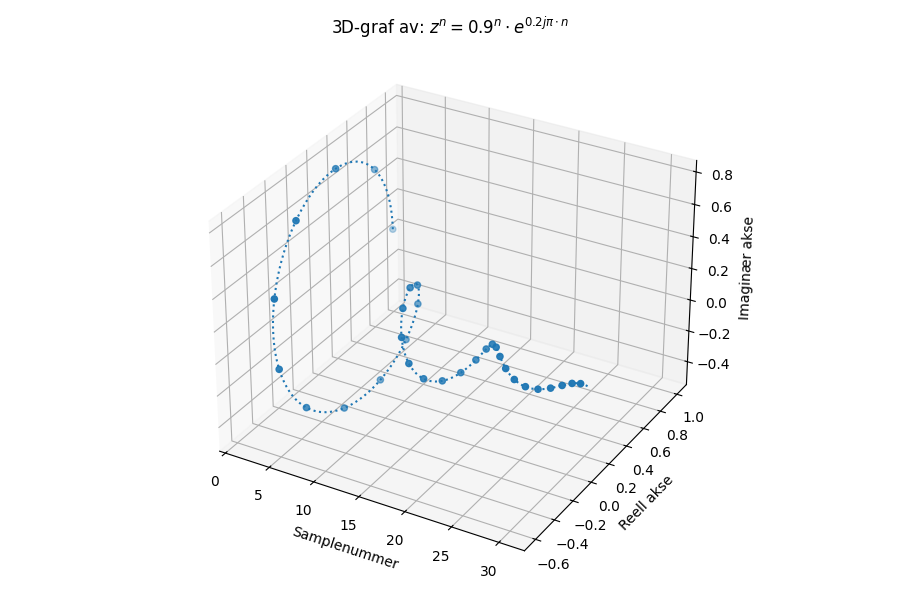

In [8]:
from demos import showDiscreteOscillation
z = 0.9*exp(1j*pi/5)
showDiscreteOscillation(z, N=32, fig_num = 3)

## Regneeksempel: 

1. Gitt et punkt i s-planet $s = -10 + j\cdot 20\pi$, hva blir den korresponderende koordinaten i z-planet når $z=e^{s\cdot T_s}$ og $f_s = 50$ sampler/sek?
2. Utfør mappingen igjen, men denne gang med $f_s = 200$ sampler/sek

# S-plan og Z-plan
$$\Large z = e^{s\cdot T_s}$$
<img src="Figurer/z_transform/s_to_z.svg" style="width: 800px; margin-left: 100px" />

## Regneeksempel 1:

* Utfør Z-transformasjon av funksjonen $h[n] = \frac{\delta[n]+\delta[n-1]+\delta[n-2]+\delta[n-3]}{4}$.

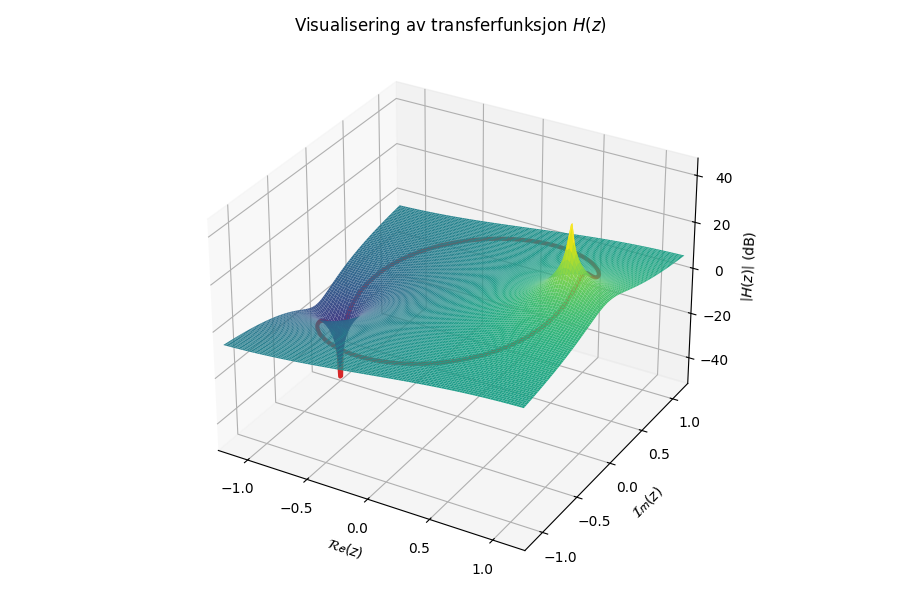

In [9]:
from demos import tfPlot
# Filter fra regneeksempel 1:
b = [1, 1] 
a = [1, -0.9]
plt.close(4); plt.figure(4, figsize=(9,6))
tfPlot(b, a) # Ikke standardfunksjon, definert i kildekoden til forelesningen.

# Tidsforskyvning i Z-planet

* Hver sample tidsforskyvning tilsvarer multiplikasjon med $z^{-1}$ i z-planet. 
$$\textbf{Z}(x[n-D]) = z^{-D}\cdot X(z)$$

* I blokkskjemarepresentasjon av filter brukes derfor $z^{-1}$ for å symbolisere tidsforskyvning/delay.

<br>
<img src="Figurer/z_transform/unit_delay.svg" style="width: 70%; margin-left: 100px" />


# LTI-filter i Z-domene
<img src="Figurer/z_transform/transfer_function.svg" style="width: 70%; margin-left: 100px" />
<br>



$$\large \begin{align}
Y(z) &= U(z)\cdot H(z) \\
\frac{Y(z)}{X(z)} &= H(z) = \mathbf{Z} \left( h[k] \right)
\end{align}$$


* $\large H(z)$ er kjent som filterets *Transferfunksjon*

# Transferfunksjon / overføringsfunksjon

* Z-transformen av impulsresponen $h[n]$ til et LTI-system kalles systemets *transferfunksjon*
* For ethvert kausalt LTI-system med filterkoeffisienter **a** og **b**, vil transferfunksjonen være:
\begin{align}
H(z) = \frac{Y(z)}{U(z)} &= \frac{\sum_{k=0}^{M} b_k \cdot z^{-k}}{\sum_{k=0}^{N} a_k \cdot z^{-k}}\\
&\text{eller}\\
&= \frac{b_0 + b_1\cdot z^{-1} + b_2 \cdot z^{-2} + \ldots + b_M \cdot z^{-M}}{a_0 + a_1\cdot z^{-1} + a_2 \cdot z^{-2} + \ldots + a_N \cdot z^{-N}}
\end{align}
* Teller og nevner er polynomer

## Regneeksempel 2:

* Finn transferfunksjonen $H(z)$ til filteret i vist i figuren:
<br>

<img src="Figurer/14_Ztransform/Fig5_ExFilt.png" style="width: 70%; margin-left: 100px" />

## Generell utledning av transferfunksjon fra differanseligning:

$$
\begin{align}
\sum_{k=0}^{N} a_k y(n-k) &= \sum_{k=0}^{M} b_k x(n-k) \\ \\
\mathbf{Z} (a_0 y(n) + a_1 y(n-1) + a_2 y(n-2) + \dots + a_N y(n-N)) &= \mathbf{Z} (b_0 x(n) + b_1 x(n-1) + b_2 x(n-2) + \dots + b_M x(n-M)) \\ \\
(a_0 + z^{-1} a_1 + z^{-2} a_2 + \dots + z^{-N} a_N) Y(z) &= (b_0 + z^{-1} b_1 + z^{-2} b_2 + \dots + z^{-M} b_M) X(z) \\ \\
\frac{Y(z)}{X(z)} &= \frac{b_0 + z^{-1} b_1 + \dots + z^{-M} b_M}{a_0 + z^{-1} a_1 + \dots + z^{-N} a_N} \\ \\
H(z) &= \frac{\sum_{k=0}^{M} b_k \cdot z^{-k}}{\sum_{k=0}^{N} a_k \cdot z^{-k}}
\end{align}
$$

# Visualisering av $H(z)$

* $H(z)$ funksjon av et komplekst tall.
    * "Gain" i transferfunksjonen ofte av størst interesse
    * Et "Surface Plot" av $|H(z)|$ vil kunne gi informasjon om forsterkningen av ulike typer signal.
    * Amplituderesponsen vil kunne leses av ved å studere konturene langs enhetssirkelen.

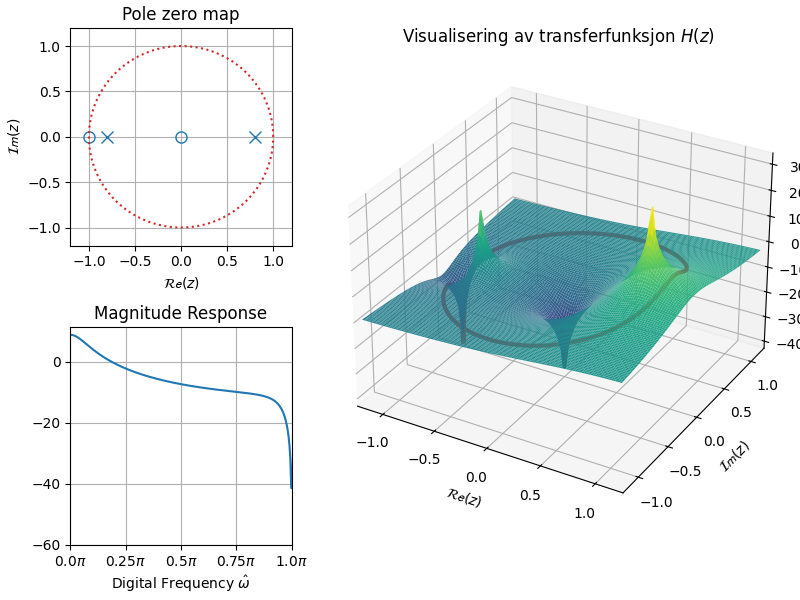

In [11]:
from demos import visualizeTF
# Filter fra regneeksempel 1:
b = [0.5, 0.5] 
a = [1, 0, -0.64]
#plt.close(4); plt.figure(4, figsize=(9,6))
visualizeTF(b, a) # Ikke standardfunksjon, definert i kildekoden til forelesningen.

# Poler og nullpunkt


* Faktorisering av *transferfunksjonen* $H(z)$ gir *poler* og *nullpunkt*
    * Eksempel:
$$H(z) = \frac{z - (-1)}{\left(z-(-0.8)\right)\left(z-0.8\right)}$$
        * Nullpunkt: $z=-1$
        * Poler: $z=\pm 0.8$

# Z-plan og frekvensrespons

* Substitusjonen $z=e^{j\hat{\omega}}$ i transferfunksjonen $H(z)$ gir systemets frekvensrespons $H(\hat{\omega})$.

$$ H(\hat{\omega}) = H(z)\bigg|_{z = e^{j\hat{\omega}}}$$

* Frekvensresponsen er oppgitt langs ***enhetssirkelen*** i z-planet.
    * Sirkulær "frekvensakse" medfører at alle aliaser av et digitalt signal er representert av samme punkt i z-planet.
    
<img src="Figurer/14_Ztransform/Fig11_Hz2Hw.png" style="width: 90%" />

## Demo frekvensrespons

Output()

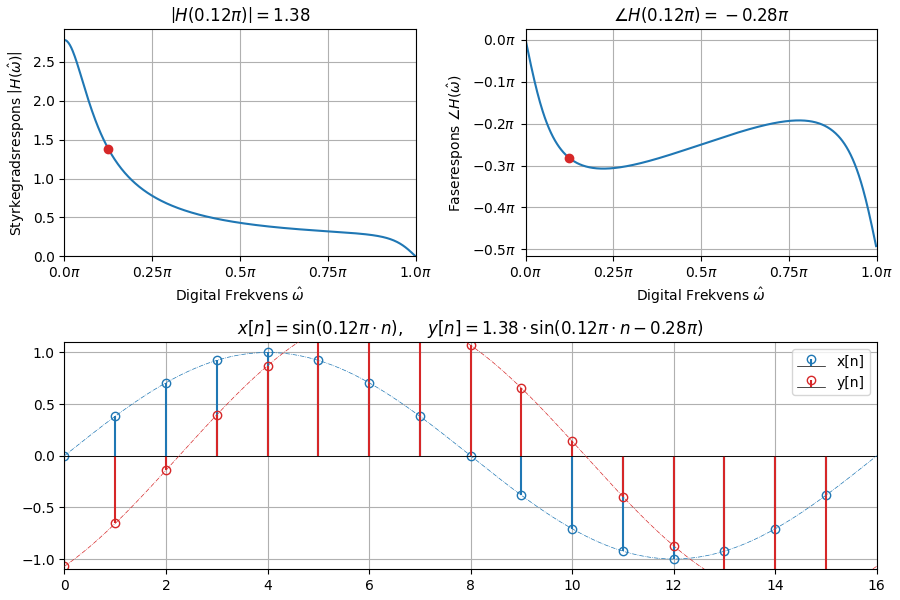

In [12]:
from demos import FreqRespDemo
b = np.array([0.5, 0.5])
a = np.array([1, 0, -0.64])
FreqRespDemo(b, a, figsize=(9,6));

## Regneeksempel 3:
* Finn frekvensresponsen til transferfunksjonen
$$H(z) =  \frac{0.2}{1-0.8\cdot z^{-1}}$$

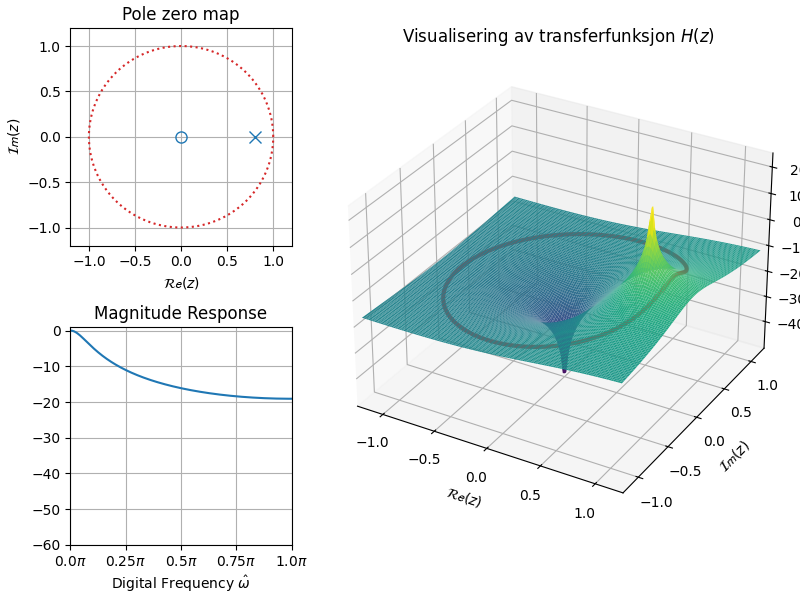

In [13]:
from demos import visualizeTF
import scipy.signal as sig

zeros = [1j, -1j]
poles = [0.8j, -0.8j]
b, a = sig.zpk2tf(zeros, poles, 1)
# Filter fra regneeksempel 1:
b = [0.2] 
a = [1, -0.8]
visualizeTF(b, a, fig_num=5) # Ikke standardfunksjon, definert i kildekoden til forelesningen.

# Oppsummering

* Analyse av IIR filtre utføres med *Z-transformasjon*
    * "Mapper" IIR-filteret til $z$-planet basert på hva responsen til et signal på formen $z^{-n}$.
    
    
* Sammenhengen mellom $s$-planet for laplace og $z$-planet fremgår av substitusjonen
$$z = e^{s \cdot T_s}$$
    * Frekvensaksen i $s$-planet avgrenses til $-\frac{F_s}{2} < f < \frac{F_s}{2}$ og "pakkes" rundt enhetssirkelen.
    * Venstre halvplan i $s$-planet flyttes til innsiden av enhetssirkelen på $z$-planet.
    
    
* Z-transforamsjon omformer en *differanseligning* til en *algebraisk ligning*
$$\begin{align}
a_0\cdot y[n] + a_1 \cdot y[n-1] + \ldots + a_N\cdot y[n-N] &= b_0\cdot x[n] + b_1 \cdot x[n-1] + \ldots + b_N\cdot x[n-M] \\
& \Downarrow \text{Z-transformasjon} \\
Y(z)\left(a_0 + a_1 \cdot z^{-1} + \ldots + a_N\cdot z^{-N} \right) &= X(z)\left(b_0 + b_1 \cdot z^{-1} + \ldots + b_N\cdot z^{-M} \right)
\end{align}$$


* Filterets frekvensrespons $H(\hat{\omega})$ finner vi ved å se på $H(z)$ langs enhetssirkelen.
$$ H(\hat{\omega}) = H(z)\big|_{z=e^{j\hat{\omega}}}$$

# Egenskaper Z-transformasjon

<img src="Figurer/14_Ztransform/Fig10_ZtransProps.png" style="width: 85%; margin-left: 50px" />

# Spørsmål?